<img src="italy-coronavirus.png" alt="Drawing" style="width: 150px;">

# 😷🦠 COVID 19 - ANALISI ANNO 2020 - ITALIA
#### by Raffaele A. Fruncillo

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(palette="tab20")
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 📚 Dataset

### 1 - Regioni

In [2]:
r= pd.read_csv('./data/regioni.csv')
r

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0


### 2 - Comuni

In [3]:
c = pd.read_csv('./data/comuni.csv', encoding='latin', delimiter=';')
c

,Denominazione,Regione,Sigla_auto,Popolazione2011
0,Agliè,Piemonte,TO,2644
1,Airasca,Piemonte,TO,3819
2,Ala di Stura,Piemonte,TO,462
3,Albiano d'Ivrea,Piemonte,TO,1791
4,Almese,Piemonte,TO,6303
...,...,...,...,...
7910,Villasalto,Sardegna,SU,1127
7911,Villasimius,Sardegna,SU,3420
7912,Villasor,Sardegna,SU,6857
7913,Villaspeciosa,Sardegna,SU,2407


### 3 - Province

In [4]:
p = pd.read_csv('./data/province.csv')
p

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
40196,40196,2020-12-06T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,24142
40197,40197,2020-12-06T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,31073
40198,40198,2020-12-06T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,4577
40199,40199,2020-12-06T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,2809


### 4 - Ripartizione

In [5]:
rip = pd.read_csv('./data/ripartizione.txt', sep='\t', encoding='latin')
rip

,Codice Regione,Ripartizione geografica,Regione
0,1,Nord-ovest,Piemonte
1,2,Nord-ovest,Valle d'Aosta/Vallée d'Aoste
2,3,Nord-ovest,Lombardia
3,4,Nord-est,Trentino-Alto Adige/Südtirol
4,5,Nord-est,Veneto
5,6,Nord-est,Friuli-Venezia Giulia
6,7,Nord-ovest,Liguria
7,8,Nord-est,Emilia-Romagna
8,9,Centro,Toscana
9,10,Centro,Umbria


## 🧼 Pulizia dataset

##### Elimino ultima riga del dataframe Comuni

In [6]:
c = c.drop(c.index[-1])

In [7]:
c

,Denominazione,Regione,Sigla_auto,Popolazione2011
0,Agliè,Piemonte,TO,2644
1,Airasca,Piemonte,TO,3819
2,Ala di Stura,Piemonte,TO,462
3,Albiano d'Ivrea,Piemonte,TO,1791
4,Almese,Piemonte,TO,6303
...,...,...,...,...
7909,Villaputzu,Sardegna,SU,4836
7910,Villasalto,Sardegna,SU,1127
7911,Villasimius,Sardegna,SU,3420
7912,Villasor,Sardegna,SU,6857


##### Elimino colonna "SNo" da Regioni poiché irrilevante

In [8]:
r = r.drop(columns=['SNo','Country','Latitude', 'Longitude'], axis=1)

##### Controllo n valori nulli nel dataframe Regioni

In [9]:
r.isnull().sum()

Date                            0
RegionCode                      0
RegionName                      0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

##### Controllo percentuale nulli sul totale righe del dataframe Province

In [10]:
(p.isnull().sum()*100)/len(p.index)

SNo                      0.000000
Date                     0.000000
Country                  0.000000
RegionCode               0.000000
RegionName               0.000000
ProvinceCode             0.000000
ProvinceName             0.000000
ProvinceAbbreviation    24.325266
Latitude                23.611353
Longitude               23.611353
TotalPositiveCases       0.000000
dtype: float64

##### Elimino colonne 'ProvinceAbbreviation', 'Latitude', 'Longitude' poiché contengono un'alta percentuale di valori nulli e non sono pertinenti all'analisi

In [11]:
p = p.drop(columns=['ProvinceAbbreviation', 'Latitude', 'Longitude'], axis=1)

##### Controllo percentuale nulli sul totale righe del dataframe Province

In [12]:
(p.isnull().sum()*100)/len(p.index)

SNo                   0.0
Date                  0.0
Country               0.0
RegionCode            0.0
RegionName            0.0
ProvinceCode          0.0
ProvinceName          0.0
TotalPositiveCases    0.0
dtype: float64

##### Controllo n valori nulli nel dataframe Comuni

In [13]:
c.isnull().sum()

Denominazione       1
Regione             0
Sigla_auto         92
Popolazione2011     0
dtype: int64

##### Controllo quali righe contengono valori nulli

In [14]:
c[c.isnull().any(axis=1)]

,Denominazione,Regione,Sigla_auto,Popolazione2011
164,NaN,Piemonte,TO,7998
5987,Acerra,Campania,NaN,56465
5988,Afragola,Campania,NaN,63820
5989,Agerola,Campania,NaN,7373
5990,Anacapri,Campania,NaN,6546
...,...,...,...,...
6074,Visciano,Campania,NaN,4550
6075,Volla,Campania,NaN,22989
6076,Santa Maria la Carità,Campania,NaN,11726
6077,Trecase,Campania,NaN,9118


##### Elimino colonna Sigla Auto da dataframe Comuni poiché non pertinente con l'analisi e alta percentuale di valori nulli

In [15]:
c = c.drop(columns=['Sigla_auto'])

In [16]:
c.dropna(inplace=True)

In [17]:
c.isnull().sum()

Denominazione      0
Regione            0
Popolazione2011    0
dtype: int64

##### Cambio tipo colonna in DateTime

In [18]:
r['Date'] = pd.to_datetime(r['Date'])

##### Il df geometry Italia contiene solo le coordinate geometry della Regione Trentino, mentre il dataset utilzzato lo divide nelle due province autonome Trento e Bolzano.

In [19]:
r[r['RegionCode'] == 22]

,Date,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
12,2020-02-24 18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,0,0,NaN
33,2020-02-25 18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,0,0,NaN
54,2020-02-26 18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,0,0,NaN
75,2020-02-27 18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,0,0,NaN
96,2020-02-28 18:00:00,22,P.A. Trento,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5934,2020-12-02 17:00:00,22,P.A. Trento,412,47,459,2000,2459,278,13043,665,16167,137151.0
5955,2020-12-03 17:00:00,22,P.A. Trento,404,45,449,2083,2532,239,13200,674,16406,138153.0
5976,2020-12-04 17:00:00,22,P.A. Trento,415,47,462,2044,2506,255,13475,680,16661,139155.0
5997,2020-12-05 17:00:00,22,P.A. Trento,404,48,452,2067,2519,226,13679,689,16887,140064.0


##### Vado a sommare i valori delle due province autonome e chiamo il valore RegionName Trentino Alto Adige con Codice Regione = 4

In [20]:
r.loc[(r['RegionName'] == 'P.A. Bolzano') | (r['RegionName'] == 'P.A. Trento'), 'RegionName'] = 'Trentino Alto Adige/Sudtirol'

In [21]:
r.loc[r['RegionName'] == 'Trentino Alto Adige/Sudtirol', 'RegionCode'] = 4

In [22]:
r[r['RegionName'] == 'Trentino Alto Adige/Sudtirol']

,Date,RegionCode,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
11,2020-02-24 18:00:00,4,Trentino Alto Adige/Sudtirol,0,0,0,0,0,0,0,0,0,NaN
12,2020-02-24 18:00:00,4,Trentino Alto Adige/Sudtirol,0,0,0,0,0,0,0,0,0,NaN
32,2020-02-25 18:00:00,4,Trentino Alto Adige/Sudtirol,1,0,1,0,1,1,0,0,1,NaN
33,2020-02-25 18:00:00,4,Trentino Alto Adige/Sudtirol,0,0,0,0,0,0,0,0,0,NaN
53,2020-02-26 18:00:00,4,Trentino Alto Adige/Sudtirol,1,0,1,0,1,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2020-12-04 17:00:00,4,Trentino Alto Adige/Sudtirol,415,47,462,2044,2506,255,13475,680,16661,139155.0
5996,2020-12-05 17:00:00,4,Trentino Alto Adige/Sudtirol,410,31,441,10671,11112,266,13429,572,25113,151590.0
5997,2020-12-05 17:00:00,4,Trentino Alto Adige/Sudtirol,404,48,452,2067,2519,226,13679,689,16887,140064.0
6017,2020-12-06 17:00:00,4,Trentino Alto Adige/Sudtirol,410,32,442,10479,10921,248,13862,578,25361,152109.0


##### Il dataframe ora contiene la somma delle due province ma le righe sono duplicate quindi le dimezzo

In [23]:
r.drop_duplicates(inplace=True)

In [24]:
r.isnull().sum()

Date                            0
RegionCode                      0
RegionName                      0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1154
dtype: int64

## 🔬 Correlazioni

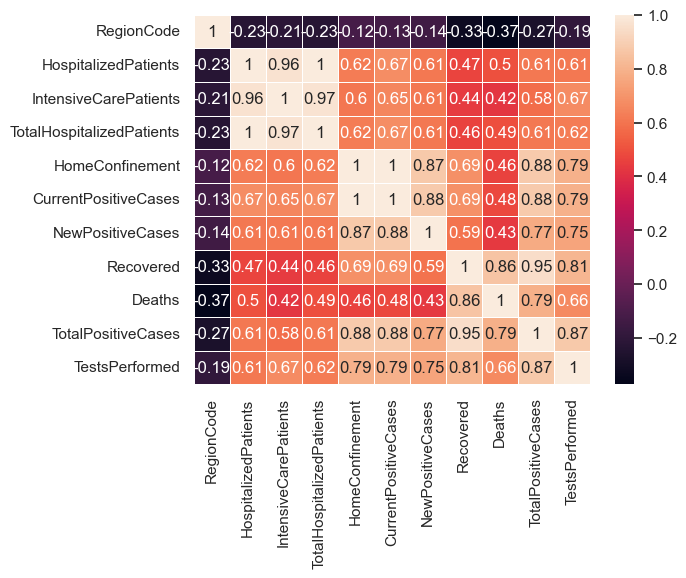

In [25]:
num_r = r.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_r.corr(), annot=True, linewidths=.5)
plt.show()

#### Gruppo 1: Pazienti Ospedalizzati (HospitalizedPatients, IntensiveCarePatients, TotalHospitalizedPatients)
HospitalizedPatients, IntensiveCarePatients: Esiste una forte correlazione positiva (0.96) tra il numero di pazienti ospedalizzati e quelli in terapia intensiva.
HospitalizedPatients, TotalHospitalizedPatients: Forte correlazione positiva (0.97) con il numero totale di pazienti ospedalizzati.

#### Gruppo 2: Pazienti a Casa e Positività Attuale (HomeConfinement, CurrentPositiveCases)
HomeConfinement, CurrentPositiveCases: Esiste una correlazione estremamente forte (0.998) tra il numero di pazienti in confinamento domestico e i casi positivi attuali.

#### Gruppo 3: Nuovi Casi Positivi e Dati sulla Guarigione (NewPositiveCases, Recovered)
NewPositiveCases, Recovered: Esiste una correlazione moderata (0.59) tra i nuovi casi positivi e i casi guariti.

#### Gruppo 4: Decessi e Totale Casi Positivi (Deaths, TotalPositiveCases)
Deaths, TotalPositiveCases: Esiste una correlazione moderata (0.79) tra il numero di decessi e il totale dei casi positivi.

#### Gruppo 5: Totale Casi Positivi e Tamponi Eseguiti (TotalPositiveCases, TestsPerformed)
TotalPositiveCases, TestsPerformed: Esiste una correlazione forte (0.87) tra il totale dei casi positivi e il numero di tamponi eseguiti.




## 📊 Analisi in Italia e per regione

##### Creo variabile df contenente la somma dei nuovi positivi giornalieri raggrupati per mesi e regioni

In [26]:
g = r.groupby([r['Date'].dt.to_period('M'), 'RegionName', 'RegionCode'])['NewPositiveCases'].sum().reset_index()
g['Date'] = g['Date'].dt.to_timestamp()
g

,Date,RegionName,RegionCode,NewPositiveCases
0,2020-02-01,Abruzzo,13,2
1,2020-02-01,Basilicata,17,0
2,2020-02-01,Calabria,18,1
3,2020-02-01,Campania,15,13
4,2020-02-01,Emilia-Romagna,8,217
...,...,...,...,...
215,2020-12-01,Toscana,9,4956
216,2020-12-01,Trentino Alto Adige/Sudtirol,4,2954
217,2020-12-01,Umbria,10,1336
218,2020-12-01,Valle d'Aosta,2,216


#### Andamento giornaliero del totale positivi in Italia .

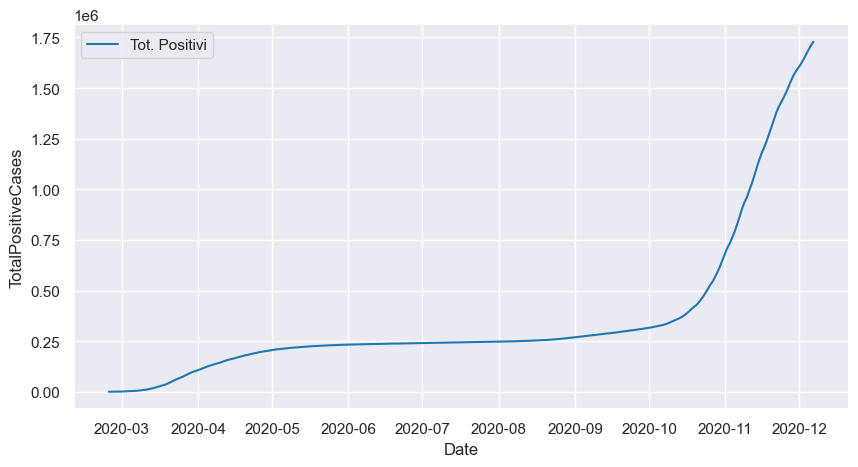

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=r.groupby('Date')['TotalPositiveCases'].sum(), label='Tot. Positivi')
plt.legend()
plt.show()

##### Alla fine dell'anno 06-12-2020 il totale dei casi positivi sia arrivato a quota 1.728.878. Questo indica un aumento significativo rispetto ai numeri precedenti e suggerisce un'espansione considerevole dell'evento o dell'epidemia che si sta monitorando.

#### Andamento giornaliero dei *nuovi* positivi in Italia per regione. Da Ottobre 2020 si può notare un aumento significativo dei contagi.

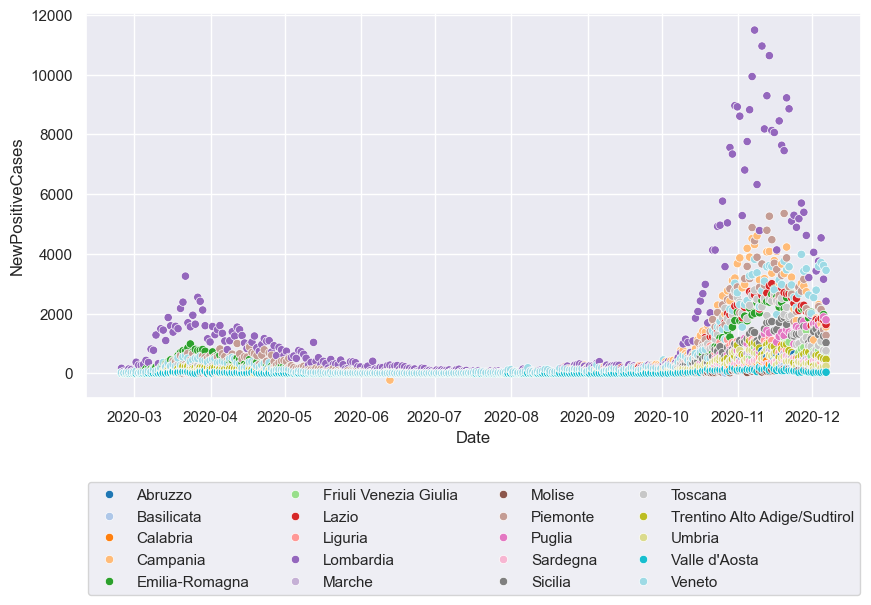

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=r.groupby(['Date', 'RegionName'])['NewPositiveCases'].sum().reset_index(), x='Date', y='NewPositiveCases', hue='RegionName', marker='o')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

#### Leggo df geometry cartina Italiana.

In [29]:
italia = gpd.read_file('data/reg2011_g.shp')
italia

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,1,PIEMONTE,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5..."
1,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."
2,3,LOMBARDIA,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126..."
3,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
4,5,VENETO,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5..."
5,6,FRIULI VENEZIA GIULIA,6.674897e+05,7.864294e+09,"MULTIPOLYGON (((852211.994 5080672.916, 852270..."
6,7,LIGURIA,8.342245e+05,5.415465e+09,"MULTIPOLYGON (((400403.625 4851436.938, 400257..."
7,8,EMILIA-ROMAGNA,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723..."
8,9,TOSCANA,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553..."
9,10,UMBRIA,6.203152e+05,8.464008e+09,"MULTIPOLYGON (((771407.451 4833282.073, 771402..."


##### Unisco i miei dati con il df geometry Italia

In [30]:
gdf = pd.merge(left=g, right=italia, how='left', left_on='RegionCode', right_on='COD_REG')

In [31]:
gdf

,Date,RegionName,RegionCode,NewPositiveCases,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry
0,2020-02-01,Abruzzo,13,2,13,ABRUZZO,6.145137e+05,1.082910e+10,"POLYGON ((901880.250 4760558.000, 901910.750 4..."
1,2020-02-01,Basilicata,17,0,17,BASILICATA,6.142192e+05,1.007326e+10,"MULTIPOLYGON (((1074503.688 4446135.938, 10744..."
2,2020-02-01,Calabria,18,1,18,CALABRIA,8.381944e+05,1.521668e+10,"MULTIPOLYGON (((1084888.411 4414364.607, 10848..."
3,2020-02-01,Campania,15,13,15,CAMPANIA,8.923791e+05,1.366399e+10,"MULTIPOLYGON (((925294.173 4528798.912, 925329..."
4,2020-02-01,Emilia-Romagna,8,217,8,EMILIA-ROMAGNA,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723..."
...,...,...,...,...,...,...,...,...,...
215,2020-12-01,Toscana,9,4956,9,TOSCANA,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553..."
216,2020-12-01,Trentino Alto Adige/Sudtirol,4,2954,4,TRENTINO-ALTO ADIGE/SUDTIROL,8.005341e+05,1.360802e+10,"POLYGON ((743386.080 5219948.900, 743472.190 5..."
217,2020-12-01,Umbria,10,1336,10,UMBRIA,6.203152e+05,8.464008e+09,"MULTIPOLYGON (((771407.451 4833282.073, 771402..."
218,2020-12-01,Valle d'Aosta,2,216,2,VALLE D'AOSTA/VALLÉE D'AOSTE\r\nVALLE D'AOSTA/...,3.111651e+05,3.259041e+09,"POLYGON ((390734.999 5091965.001, 390830.999 5..."


#### Situazione regioni italiane da Febbraio 2020 a Dicembre 2020: Tot nuovi positivi mensili

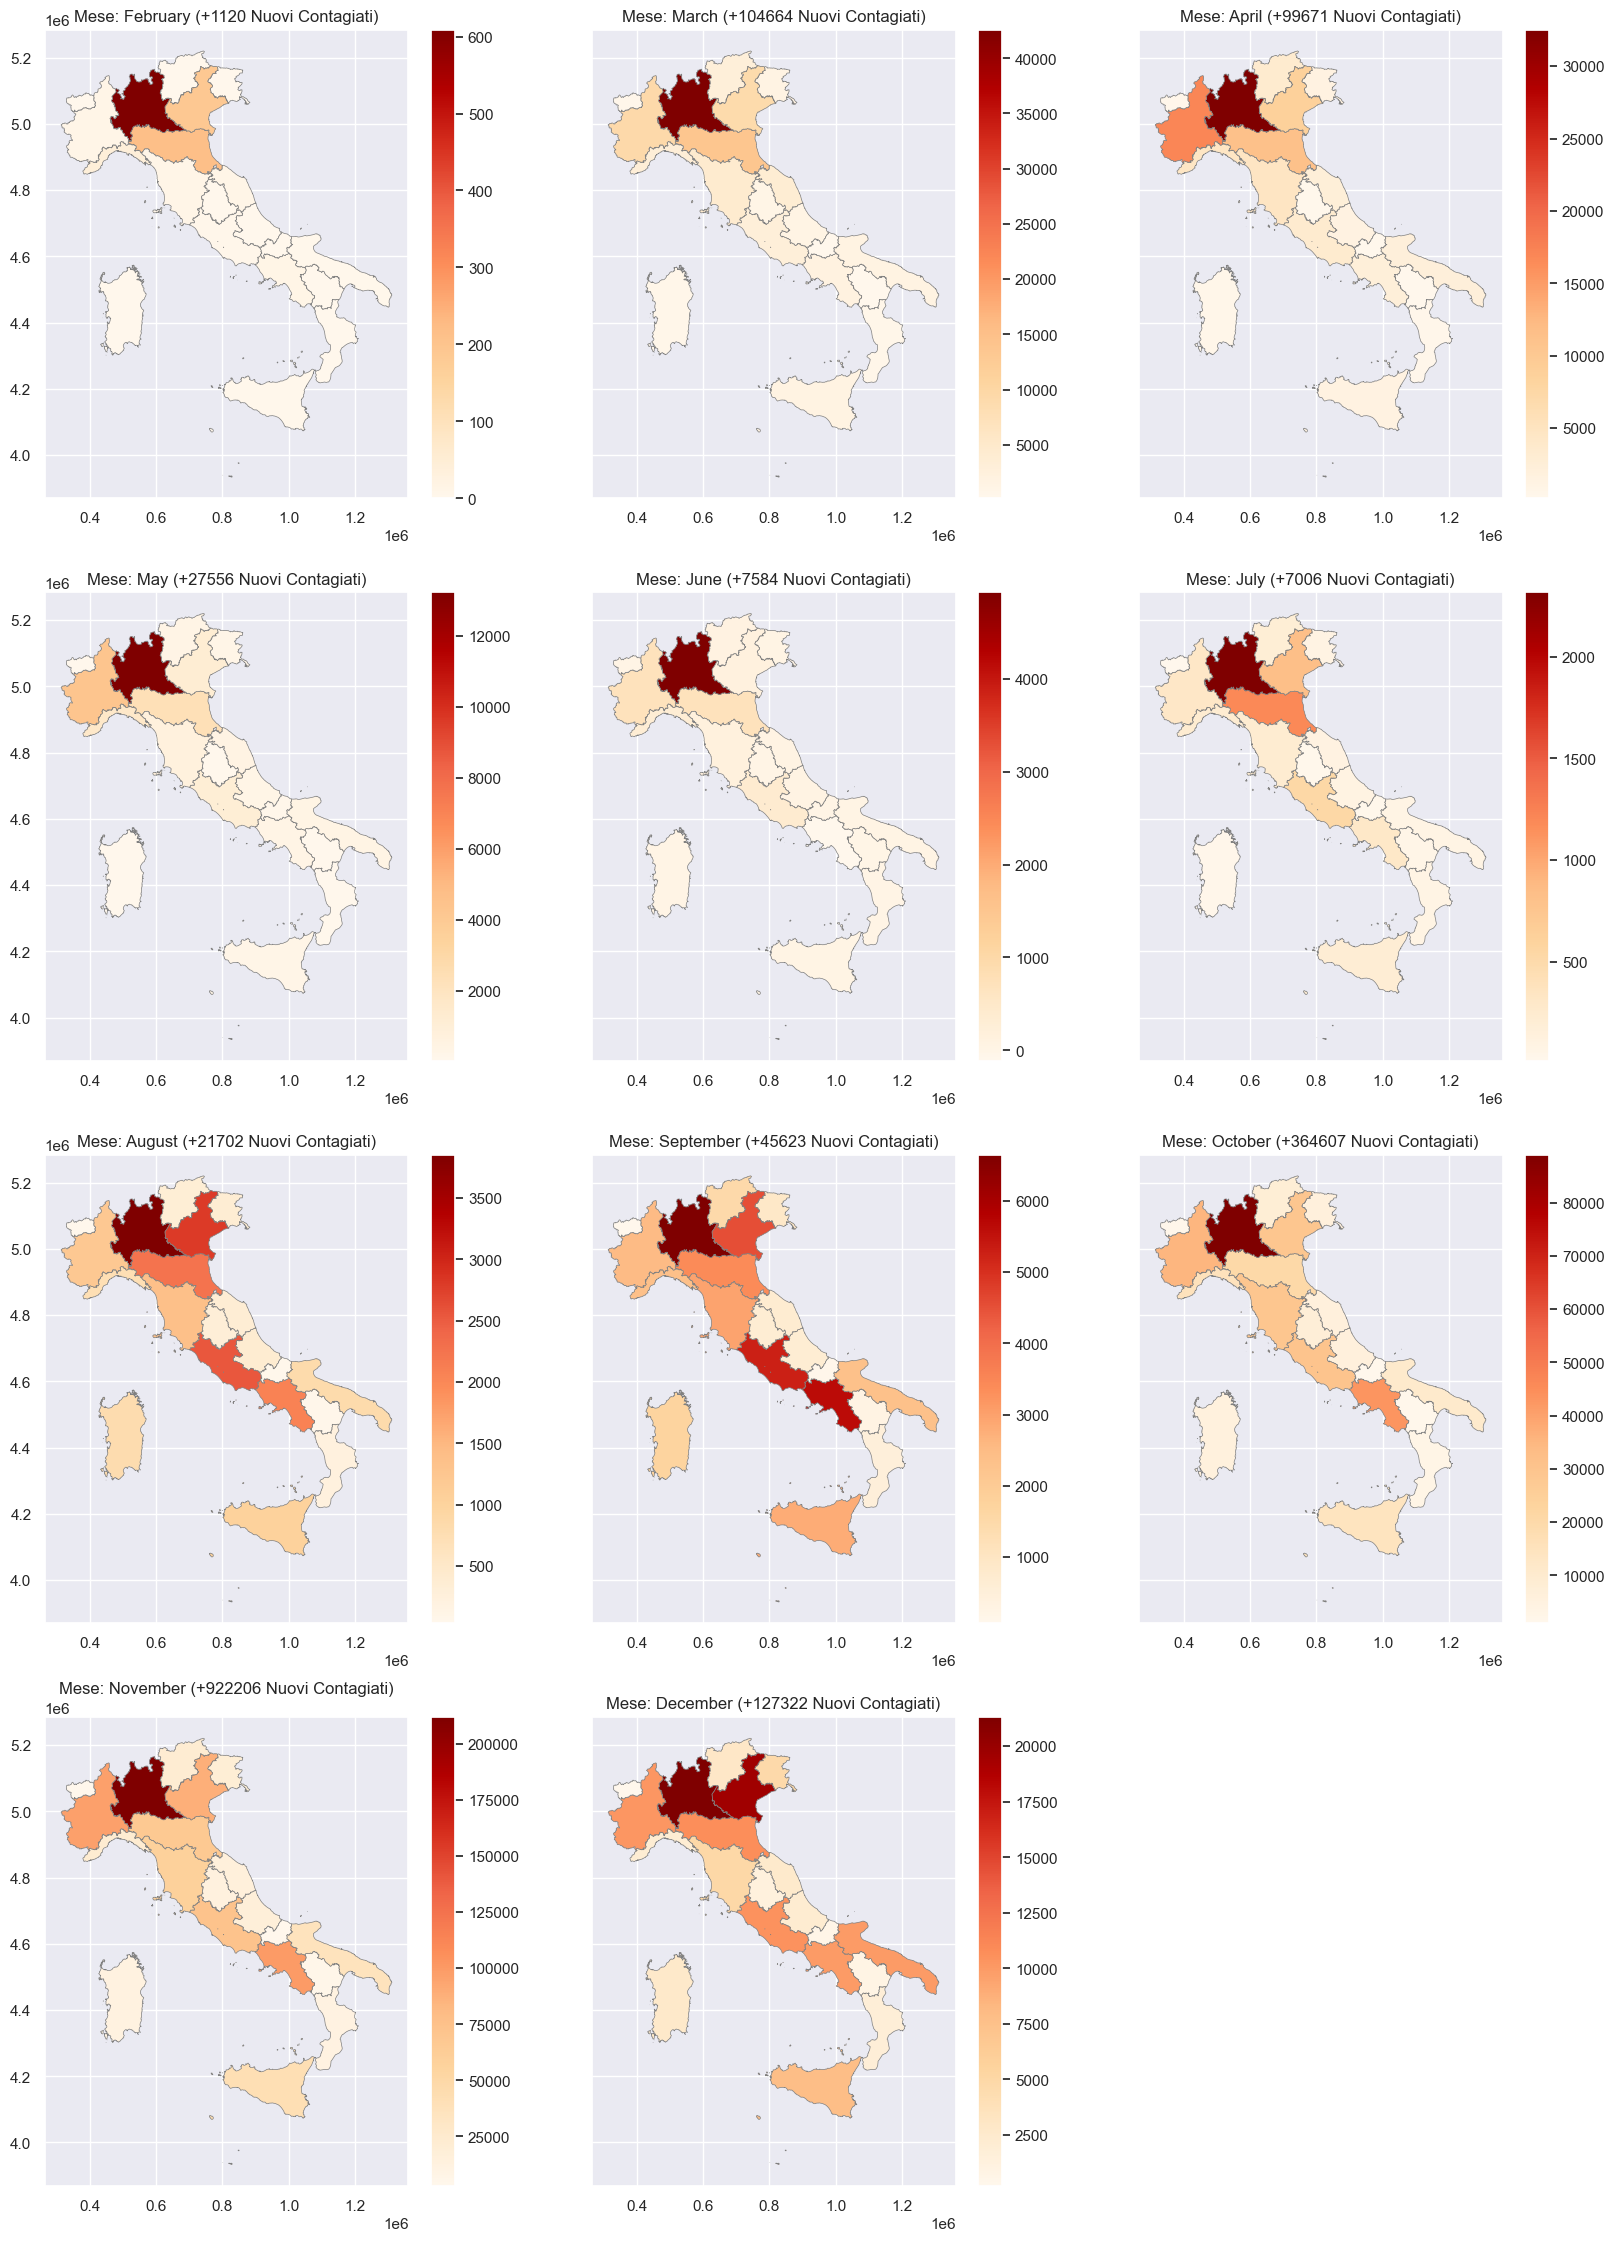

In [32]:
fig, axs = plt.subplots(4, 3, figsize=(20, 28), sharey=True)

for i, ax in zip(gdf['Date'].unique(), axs.flatten()):
    data_for_date = gpd.GeoDataFrame(gdf[gdf['Date'] == i])
    data_for_date.plot(
                ax=ax,
                column='NewPositiveCases',
                cmap='OrRd',
                legend='auto',
                label=str(i),
                edgecolor='gray',
                linewidth=.5 
    )
    ax.set_title(f'Mese: {i.strftime("%B")} (+{data_for_date["NewPositiveCases"].sum()} Nuovi Contagiati)')
axs.flatten()[-1].remove()

##### Il mese di Novembre è stato quello con piu contagiati.

#### Totale positivi nell'anno 2020.

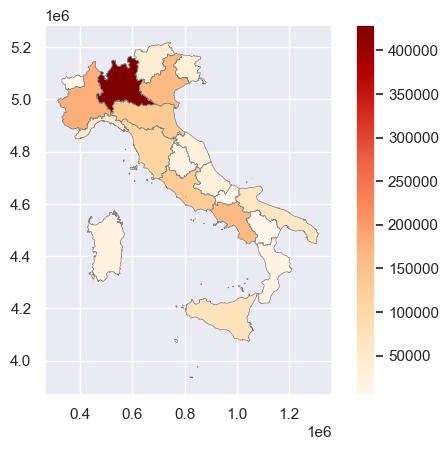

In [33]:
g2 = gdf.groupby(['RegionName', 'RegionCode'])['NewPositiveCases'].sum().reset_index() #totale dei positivi in tutti l'anno per regione
gdf2 = pd.merge(left=g2, right=italia, how='left', left_on='RegionCode', right_on='COD_REG')
gdf2 = gdf2.rename(columns={'NewPositiveCases': 'TotPositiviAnn'})
gpd.GeoDataFrame(gdf2).plot(
                column='TotPositiviAnn',
                cmap='OrRd',
                legend='auto',
                edgecolor='gray',
                linewidth=.5 )
plt.show()

##### Lombardia ha il maggior numero di nuovi casi positivi: 
Con 429.103 nuovi casi positivi registrati, la Lombardia ha il numero più elevato di nuovi casi positivi rispetto alle altre regioni.
##### Altre regioni con numeri significativi: 
Emilia-Romagna (133.897), Campania (165.251), Piemonte (177.788), e Lazio (130.254) mostrano anch'esse un numero significativo di nuovi casi positivi, seppur in misura minore rispetto alla Lombardia.
##### Regioni con numeri più bassi di nuovi casi positivi: 
Alcune regioni hanno registrato numeri relativamente bassi di nuovi casi positivi rispetto alle altre, ad esempio Valle d'Aosta (6.726) e Molise (5.285).
##### Nessuna regione è immune: 
Tutte le regioni hanno riportato un numero considerevole di nuovi casi positivi, indicando che l'epidemia ha avuto un impatto diffuso sull'intero paese.
##### Distribuzione geografica: 
Le regioni del nord Italia sembrano essere più gravemente colpite rispetto a quelle del sud, sebbene tutte le regioni abbiano segnalato casi.

### Andamento nel tempo dei tot positivi. 1.728.878 che si sono contagiate da inizio anno fino a dicembre 2020 di cui 913.494 guariti e 60.078 morti totali.

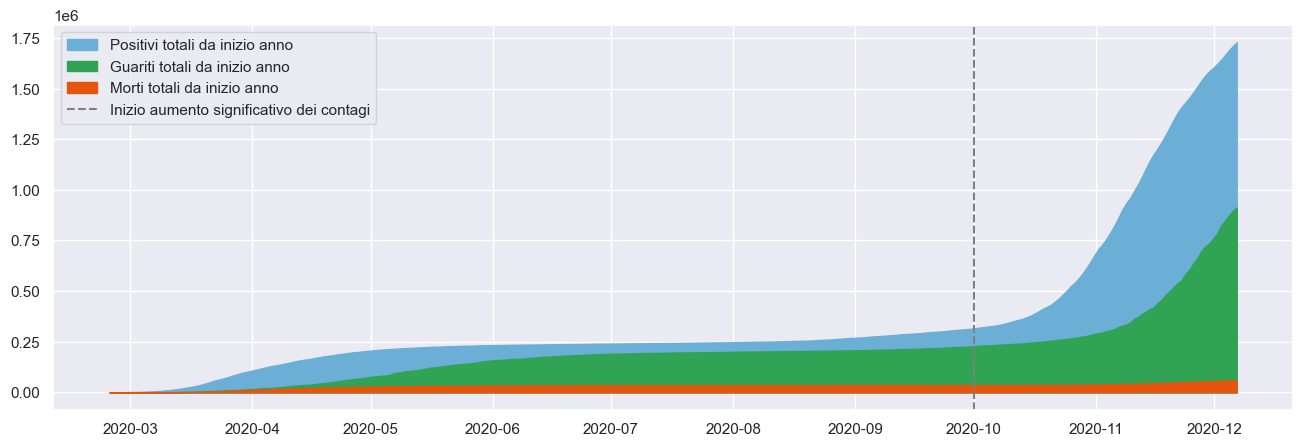

In [34]:
k = r.groupby('Date')[['TotalPositiveCases', 'Recovered', 'Deaths']].sum().reset_index()
plt.figure(figsize=(16,5))
plt.fill_between(k['Date'], k['TotalPositiveCases'], label='Positivi totali da inizio anno', color = sns.color_palette('tab20c')[1])
plt.fill_between(k['Date'], k['Recovered'], label='Guariti totali da inizio anno', color = sns.color_palette('tab20c')[8])
plt.fill_between(k['Date'], k['Deaths'], label='Morti totali da inizio anno',  color = sns.color_palette('tab20c')[4])
plt.axvline(x=datetime.datetime(2020, 10, 1), color='gray', linestyle='--', label='Inizio aumento significativo dei contagi')
plt.legend(loc='upper left')
plt.show()

##### Persone ancora malate: 
Per calcolare il numero di persone ancora malate al momento, possiamo sottrarre il numero di guariti e il numero di decessi dal totale dei casi positivi:
1.728.878 - 913.494 - 60.078 = 755.306
Quindi, al momento, ci sono ancora 755.306 persone che potrebbero essere considerate attive o in corso di trattamento per la malattia.

In [35]:
k.max()

Date                  2020-12-06 17:00:00
TotalPositiveCases                1728878
Recovered                          913494
Deaths                              60078
dtype: object

### Evoluzione degli attuali positivi.

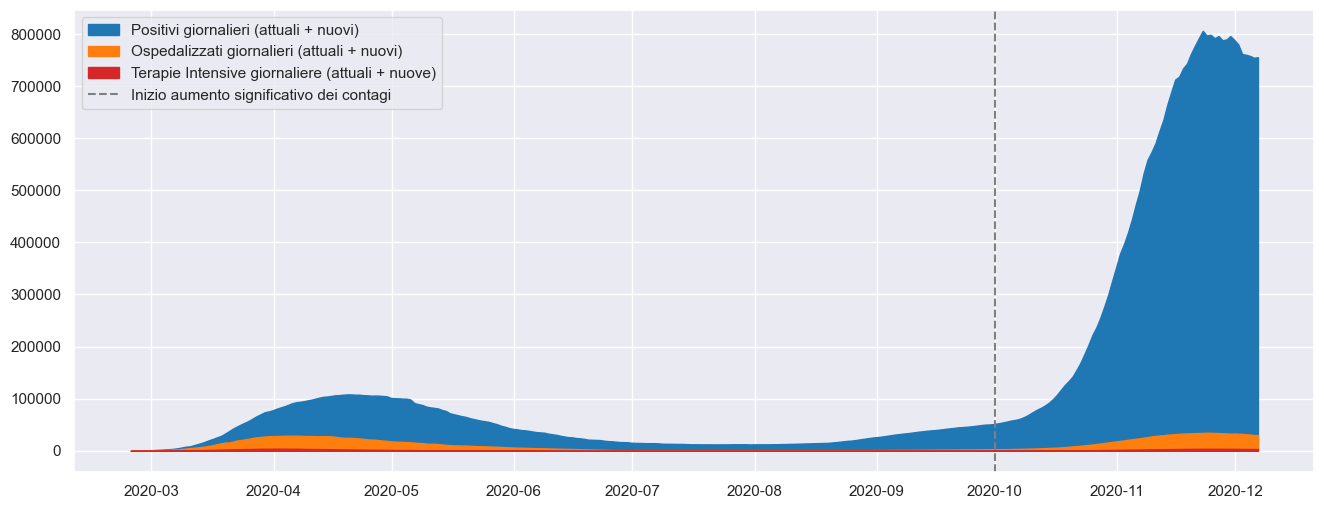

In [36]:
j = r.groupby('Date')[['CurrentPositiveCases', 'HospitalizedPatients', 'IntensiveCarePatients']].sum().reset_index()
plt.figure(figsize=(16,6))
plt.fill_between(j['Date'], j['CurrentPositiveCases'], label='Positivi giornalieri (attuali + nuovi)', color = sns.color_palette('tab20')[0])
plt.fill_between(j['Date'], j['HospitalizedPatients'], label='Ospedalizzati giornalieri (attuali + nuovi)', color = sns.color_palette('tab20')[2])
plt.fill_between(j['Date'], j['IntensiveCarePatients'], label='Terapie Intensive giornaliere (attuali + nuove)', color = sns.color_palette('tab20')[6])
plt.axvline(x=datetime.datetime(2020, 10, 1), color='gray', linestyle='--', label='Inizio aumento significativo dei contagi')
plt.legend(loc='upper left')
plt.show()

##### Il numero di pazienti ospedalizzati e in terapia intensiva mostra variazioni nel tempo. Si osserva un aumento dei pazienti ospedalizzati e in terapia intensiva mano a mano che i casi positivi aumentano. L'aumento dei pazienti ospedalizzati e in terapia intensiva può mettere sotto pressione il sistema sanitario, specialmente se la crescita è rapida e sostenuta nel tempo.


## 📈 Analisi regione piu' colpita: Lombardia.

In [37]:
df_lombardia = p.groupby(['Date', 'RegionName','ProvinceName','ProvinceCode'])['TotalPositiveCases'].sum().reset_index()
df_lombardia = df_lombardia[df_lombardia['RegionName'] == 'Lombardia'].set_index('Date')
df_lombardia = df_lombardia[(df_lombardia['ProvinceName'] != 'In fase di definizione/aggiornamento') & (df_lombardia['ProvinceName'] != 'Fuori Regione / Provincia Autonoma')]
df_lombardia.drop(columns=['RegionName'], inplace=True)

In [38]:
df_lombardia

,ProvinceName,ProvinceCode,TotalPositiveCases
Date,,,
2020-02-24T18:00:00,Bergamo,16,0
2020-02-24T18:00:00,Brescia,17,0
2020-02-24T18:00:00,Como,13,0
2020-02-24T18:00:00,Cremona,19,0
2020-02-24T18:00:00,Lecco,97,0
...,...,...,...
2020-12-06T17:00:00,Milano,15,158717
2020-12-06T17:00:00,Monza e della Brianza,108,44603
2020-12-06T17:00:00,Pavia,18,21197


##### Siccome TotalPositiveCases mostra l'andamento incrementato giornalmente, prendo il valore massimo del mese (quindi il picco dell'ultimo giorno del mese) per avere una panoramica mensile.

In [39]:
df_lombardia.index = pd.to_datetime(df_lombardia.index)
df_province_m = df_lombardia.groupby(['Date', 'ProvinceName', 'ProvinceCode'])['TotalPositiveCases'].max().reset_index()
df_province_m.tail(12)

,Date,ProvinceName,ProvinceCode,TotalPositiveCases
3432,2020-12-06 17:00:00,Bergamo,16,25914
3433,2020-12-06 17:00:00,Brescia,17,36010
3434,2020-12-06 17:00:00,Como,13,29942
3435,2020-12-06 17:00:00,Cremona,19,13322
3436,2020-12-06 17:00:00,Lecco,97,11745
3437,2020-12-06 17:00:00,Lodi,98,9373
3438,2020-12-06 17:00:00,Mantova,20,13002
3439,2020-12-06 17:00:00,Milano,15,158717
3440,2020-12-06 17:00:00,Monza e della Brianza,108,44603
3441,2020-12-06 17:00:00,Pavia,18,21197


#### Andamento giornaliero dei totali positivi regione Lombardia per provincia

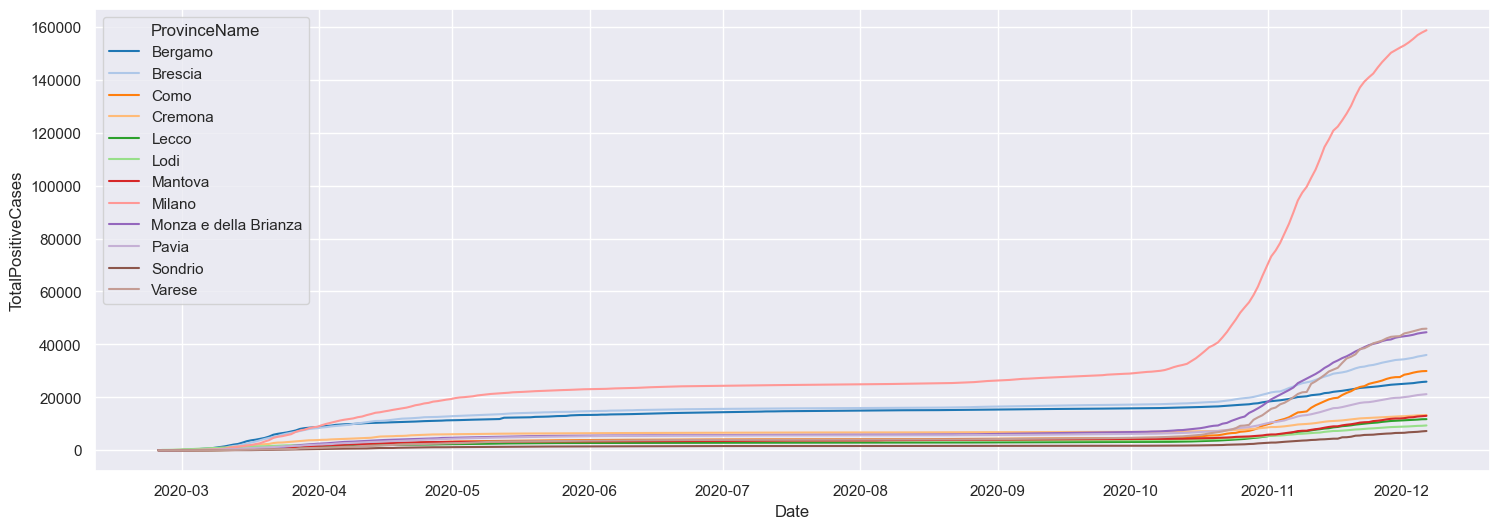

In [40]:
fig = plt.figure(figsize=(18,6))
sns.lineplot(data=df_province_m, x='Date', y='TotalPositiveCases', hue='ProvinceName')
plt.show()

#### Situazione contagi al 31/12/2020

##### Milano al primo posto: 
Milano, con 158.717 casi positivi al 6 dicembre 2020, si conferma come la provincia lombarda con il numero più alto di casi.
##### Seconda posizione per Varese: 
Varese segue Milano con 45.944 casi positivi, attestandosi come la seconda provincia con il numero più alto di casi nella regione Lombardia.
##### Distribuzione dei casi: 
Questi dati sottolineano l'ampia distribuzione dell'epidemia in diverse province della Lombardia, con Milano e Varese che riportano i numeri più alti.

##### Leggo dataframe geometry province Italiane.

In [41]:
geoprovince = gpd.read_file('./data/limits_IT_provinces.geojson')

In [42]:
geolombardia = geoprovince[geoprovince['reg_name'] == 'Lombardia']
geolombardia['prov_istat_code'] = geolombardia['prov_istat_code'].astype('int64')

In [43]:
geolombardia

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
9,Varese,12,VA,Lombardia,03,3,12,"POLYGON ((8.57964 45.75172, 8.57532 45.75629, ..."
10,Como,13,CO,Lombardia,03,3,13,"MULTIPOLYGON (((8.95038 45.71987, 8.95057 45.7..."
11,Sondrio,14,SO,Lombardia,03,3,14,"POLYGON ((9.64346 46.05997, 9.64298 46.05972, ..."
12,Milano,15,MI,Lombardia,03,3,15,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3..."
13,Bergamo,16,BG,Lombardia,03,3,16,"POLYGON ((9.59083 45.47607, 9.58538 45.46842, ..."
14,Brescia,17,BS,Lombardia,03,3,17,"POLYGON ((10.42838 45.32070, 10.42933 45.31887..."
15,Pavia,18,PV,Lombardia,03,3,18,"MULTIPOLYGON (((8.69065 45.29253, 8.69724 45.2..."
16,Cremona,19,CR,Lombardia,03,3,19,"POLYGON ((9.55078 45.46032, 9.55452 45.46017, ..."
17,Mantova,20,MN,Lombardia,03,3,20,"POLYGON ((10.49247 45.13242, 10.49092 45.13325..."
18,Lecco,97,LC,Lombardia,03,3,97,"POLYGON ((9.32406 45.89578, 9.31238 45.90536, ..."


##### Unisco geometry lombardia con il mio dataframe.

In [44]:
gdl = pd.merge(left=df_province_m, right=geolombardia, how='left', left_on='ProvinceCode', right_on='prov_istat_code')
gdl

,Date,ProvinceName,ProvinceCode,TotalPositiveCases,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
0,2020-02-24 18:00:00,Bergamo,16,0,Bergamo,16,BG,Lombardia,03,3,16,"POLYGON ((9.59083 45.47607, 9.58538 45.46842, ..."
1,2020-02-24 18:00:00,Brescia,17,0,Brescia,17,BS,Lombardia,03,3,17,"POLYGON ((10.42838 45.32070, 10.42933 45.31887..."
2,2020-02-24 18:00:00,Como,13,0,Como,13,CO,Lombardia,03,3,13,"MULTIPOLYGON (((8.95038 45.71987, 8.95057 45.7..."
3,2020-02-24 18:00:00,Cremona,19,0,Cremona,19,CR,Lombardia,03,3,19,"POLYGON ((9.55078 45.46032, 9.55452 45.46017, ..."
4,2020-02-24 18:00:00,Lecco,97,0,Lecco,97,LC,Lombardia,03,3,97,"POLYGON ((9.32406 45.89578, 9.31238 45.90536, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3439,2020-12-06 17:00:00,Milano,15,158717,Milano,15,MI,Lombardia,03,3,15,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3..."
3440,2020-12-06 17:00:00,Monza e della Brianza,108,44603,Monza e della Brianza,108,MB,Lombardia,03,3,108,"POLYGON ((9.40312 45.57324, 9.40086 45.57210, ..."
3441,2020-12-06 17:00:00,Pavia,18,21197,Pavia,18,PV,Lombardia,03,3,18,"MULTIPOLYGON (((8.69065 45.29253, 8.69724 45.2..."
3442,2020-12-06 17:00:00,Sondrio,14,7264,Sondrio,14,SO,Lombardia,03,3,14,"POLYGON ((9.64346 46.05997, 9.64298 46.05972, ..."


In [45]:
popolazione_lomb = c[c['Regione'] == 'Lombardia']['Popolazione2011'].sum()
popolazione_lomb

9704151

In [46]:
contag_su_popolo = [[gdl[gdl['Date'] >= datetime.datetime(2020, 12, 6)]['TotalPositiveCases'].sum(), 0],['Tot.Contagiati in Lombardia al 31/12/2020', 'Non ancora contagiati']]
contag_su_popolo[0][1] = popolazione_lomb - contag_su_popolo[0][0]
contag_su_popolo

[[417033, 9287118],
 ['Tot.Contagiati in Lombardia al 31/12/2020', 'Non ancora contagiati']]

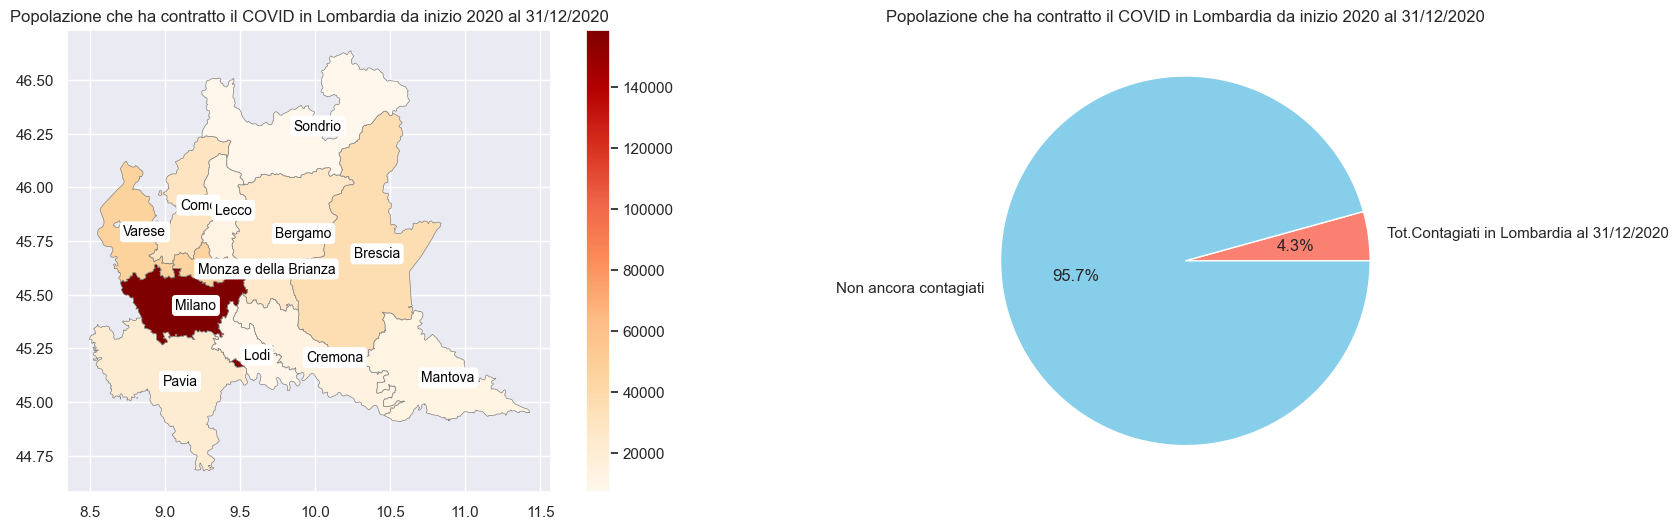

In [47]:
gdl2 = gdl[gdl['Date'] >= datetime.datetime(2020, 12, 6)]
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
l = gpd.GeoDataFrame(gdl2).plot(
                column='TotalPositiveCases',
                cmap='OrRd',
                legend='auto',
                edgecolor='gray',
                linewidth=.5,
                ax=axs[0])
axs[0].set_title('Popolazione che ha contratto il COVID in Lombardia da inizio 2020 al 31/12/2020')
axs[1].set_title('Popolazione che ha contratto il COVID in Lombardia da inizio 2020 al 31/12/2020')
for idx, row in gdl2.iterrows():
    axs[0].annotate(text=row['ProvinceName'], 
                xy=(row.geometry.centroid.x-.08, row.geometry.centroid.y-.05), 
                xytext=(3, 3), 
                textcoords="offset points", 
                fontsize=10,
                color='black',  
                bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))  
axs[1].pie(contag_su_popolo[0], labels=contag_su_popolo[1], autopct=f'%1.1f%%', colors=['salmon', 'skyblue'])    
plt.show()

In [48]:
rapporto = contag_su_popolo[0][0] / popolazione_lomb
persone =  popolazione_lomb / contag_su_popolo[0][0]
print(f"Il rapporto tra contagi totali del 2020 in Lombardia e popolazione lombarda è: {rapporto: .2f} ovvero 1 persona su {persone: .0f}")

Il rapporto tra contagi totali del 2020 in Lombardia e popolazione lombarda è:  0.04 ovvero 1 persona su  23


## 🏙️ Analisi contagiati totali della provincia piu colpita: Milano. 

##### Voglio analizzare quanti sono gli abitanti di Milano provincia e fare il rapporto tra contagiati e popolazione intera

In [49]:
comuni_prov_milano = []
with open('./data/comuni_prov_milano.txt', 'r') as file: #file in cartella chiamato comuni_prov_milano.txt contenenti i comuni della provincia
    for riga in file:
        comune = riga.strip()
        comuni_prov_milano.append(comune)
comuni_prov_milano     
popol_prov_milano_2011 = c[c['Denominazione'].isin(comuni_prov_milano)]['Popolazione2011'].sum()
print(f'Popolazione tot provincia di Milano nel 2011: {popol_prov_milano_2011}')

Popolazione tot provincia di Milano nel 2011: 3038420


In [50]:
contagiati_prov_milano = df_province_m[(df_province_m['Date'] > datetime.datetime(2020,12,6))&(df_province_m['ProvinceName'] == 'Milano')]['TotalPositiveCases'].max()
print(f'Contagiati tot provincia di Milano a fine 2020: {contagiati_prov_milano}')

Contagiati tot provincia di Milano a fine 2020: 158717


In [51]:
print(f'Rapporto tra contagiati e popolazione: {contagiati_prov_milano/popol_prov_milano_2011: .2f}')
print(f'1 persona su {popol_prov_milano_2011/contagiati_prov_milano: .0f}')

Rapporto tra contagiati e popolazione:  0.05
1 persona su  19


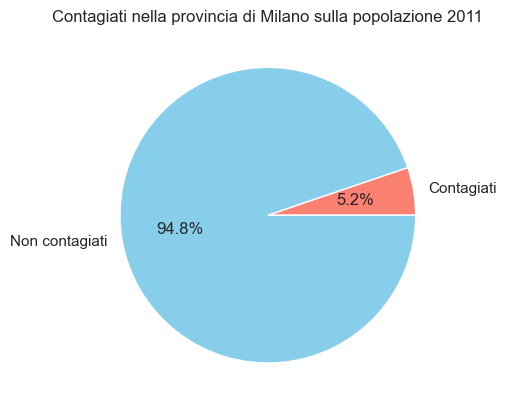

In [52]:
plt.pie([contagiati_prov_milano, popol_prov_milano_2011 - contagiati_prov_milano], autopct=f'%1.1f%%', colors=['salmon', 'skyblue'], labels=['Contagiati','Non contagiati'])    
plt.title('Contagiati nella provincia di Milano sulla popolazione 2011')
plt.show()

## ☢️ Analisi tamponi per regione

In [53]:
tamponi_positivi = r.groupby(['RegionName','RegionCode'])[['TotalPositiveCases','TestsPerformed']].max().reset_index()
tamponi_positivi.head()

,RegionName,RegionCode,TotalPositiveCases,TestsPerformed
0,Abruzzo,13,30274,246492.0
1,Basilicata,17,8940,160485.0
2,Calabria,18,18537,370059.0
3,Campania,15,165293,1153658.0
4,Emilia-Romagna,8,133761,1115823.0


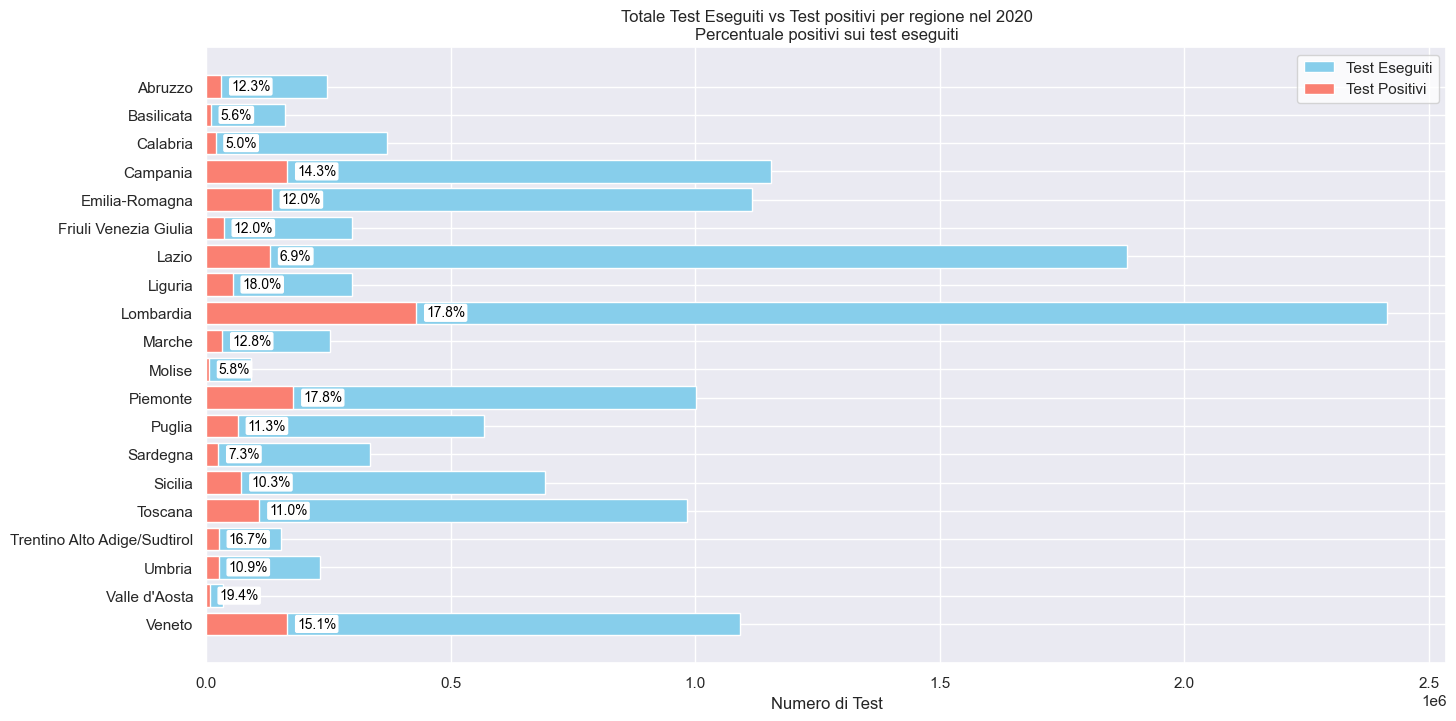

In [54]:
plt.figure(figsize=(16, 8))
plt.barh(tamponi_positivi['RegionName'], tamponi_positivi['TestsPerformed'], color='skyblue', label='Test Eseguiti')
plt.barh(tamponi_positivi['RegionName'], tamponi_positivi['TotalPositiveCases'], color='salmon', label='Test Positivi')
plt.xlabel('Numero di Test')
plt.title('Totale Test Eseguiti vs Test positivi per regione nel 2020\nPercentuale positivi sui test eseguiti')
plt.legend(facecolor='white')
plt.gca().invert_yaxis()
for idx, rows in tamponi_positivi.iterrows():
    percentuale = (rows[2]/rows[3])*100
    plt.annotate(
                 text=f'%1.1f%%'%percentuale, 
                 xy=(rows[2]+20000, idx), 
                 ha='left', va='center', 
                 color='black', 
                 fontsize=10, 
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.1'))  
plt.show()

##### Percentuale di test positivi: 
Possiamo notare che la Valle d'Aosta ha la percentuale più alta di test positivi rispetto ai test eseguiti (19.41%), seguita dalla Liguria (18.03%) e dalla Lombardia (17.77%). Questo potrebbe indicare una diffusione significativa del virus in queste regioni o una maggiore severità nell'assegnazione dei test.

##### Variazioni regionali: 
Le percentuali di test positivi variano considerevolmente da regione a regione, indicando differenze nella diffusione del virus e nell'accesso al testing tra le diverse aree.

##### Sicilia e Molise: 
Queste due regioni hanno una percentuale di test positivi relativamente più bassa rispetto ad altre regioni, potrebbe essere un segnale di un minor impatto del virus o di una maggiore disponibilità di test.


# 🤖 Predire numero di morti in Lombardia a distanza di 5 giorni, oltre il 06/12/2020 con ML

In [55]:
r_model_df = r.copy()

In [56]:
r_model_df['Mese'] = r_model_df['Date'].dt.month
r_model_df['Giorno'] = r_model_df['Date'].dt.day

In [57]:
r_model_df = r_model_df[['RegionCode', 'TotalHospitalizedPatients', 'Deaths', 'CurrentPositiveCases', 'IntensiveCarePatients', 'Mese', 'Giorno']]

In [58]:
r_model_df = r_model_df[r_model_df['RegionCode'] == 3]

In [59]:
data_model_lombardia = r_model_df.drop(columns=['RegionCode'])

In [60]:
data_model_lombardia

,TotalHospitalizedPatients,Deaths,CurrentPositiveCases,IntensiveCarePatients,Mese,Giorno
8,95,6,166,19,2,24
29,104,9,231,25,2,25
50,104,9,249,25,2,26
71,213,14,349,41,2,27
92,282,17,474,47,2,28
...,...,...,...,...,...,...
5930,8077,22279,118796,855,12,2
5951,7861,22626,118331,836,12,3
5972,7614,22773,116702,822,12,4
5993,7359,22884,115756,805,12,5


In [61]:
#minvalues = r_model_df.min()
#maxvalues = r_model_df.max()

In [62]:
#scaler = MinMaxScaler()
#r_model_df[['TotalHospitalizedPatients', 'Deaths', 'TotalPositiveCases', 'IntensiveCarePatients']]= scaler.fit_transform(r_model_df[['TotalHospitalizedPatients', 'Deaths', 'TotalPositiveCases', 'IntensiveCarePatients']])

### Per semplificare creo la mia classe che traina il modello e mi restituisce la predizione e le metriche di prestazione modello (RMSE, MAE e R^2)

In [63]:
class Alg:
    def __init__(self, algt,dfm, regione=1, titolo='ALGO', test=None):
        self.dfm = dfm
        self.regione = regione
        self.titolo = titolo
        self.test = test
        self.algt = algt
        self._train()
        self._xpredict()
        
    def _normalize(self):
        columns = self.x_train.columns
        scaler = MinMaxScaler()
        col = ['TotalHospitalizedPatients', 'TotalPositiveCases', 'IntensiveCarePatients']
        self.x_train_normalized = self.x_train.copy()
        #self.x_train_normalized=  scaler.fit_transform(self.x_train_normalized)
        self.x_test_normalized = self.x_test.copy()
        #self.x_test_normalized =  scaler.fit_transform(self.x_test_normalized)
        self.x_train_normalized_df = pd.DataFrame(self.x_train_normalized, columns=columns)
        self.x_test_normalized_df = pd.DataFrame(self.x_test_normalized, columns=columns)
        
    def _ttsplit(self):
        X = self.dfm.drop(columns=['Deaths'])
        y = self.dfm['Deaths']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        #self.x_train = self.dfm[self.dfm['Mese'] <= 7].drop(columns=['Deaths'])
        #self.x_test =  self.dfm[self.dfm['Mese'] > 7].drop(columns=['Deaths'])
        #self.y_train = self.dfm[self.dfm['Mese'] <= 7]['Deaths']
        #self.y_test = self.dfm[self.dfm['Mese'] > 7]['Deaths']
        self._normalize()
        
    def _train(self):
        self._ttsplit()
        self.algt.fit(self.x_train_normalized, self.y_train)
        
    def _xpredict(self):
        self.y_pred = self.algt.predict(self.x_test_normalized)
        self.rmse = mean_squared_error(self.y_test, self.y_pred, squared=False)
        self.mae  = mean_absolute_error(self.y_test, self.y_pred)
        self.r2   = r2_score(self.y_test, self.y_pred)
        
    def metrics(self):
        return dict({'RMSE': self.rmse, 'MAE': self.mae, 'R2': self.r2})
    
    def getDF(self):
        self.DF = self.x_test_normalized_df.copy()
        self.DF['Target'] = self.y_test
        self.DF['Predizione'] = self.y_pred
        return self.DF
    
    def getChart(self):
        self.getDF()
        morti_reali = self.DF['Target']
        morti_predict = self.DF['Predizione']
        mesi = self.DF['Mese']
        giorni = self.DF['Giorno']
        date = [datetime.datetime(2020, m, d) for m, d in zip(mesi, giorni)]
        plt.figure(figsize=(14, 8))
        plt.title(self.titolo)
        plt.scatter(date, morti_reali, label='Morti Reali', color='blue', marker='o')
        plt.scatter(date, morti_predict, label='Morti Predette', color='orange', marker='x')
        plt.legend()
        plt.show()
        
    def predictExtData(self, data):
        return self.algt.predict(data) 

### Provo 3 modelli: Regressione Lineare, SVM e Regressione Polinomiale

In [64]:
regL = Alg(algt = LinearRegression(), titolo='Regressione Lineare', dfm=data_model_lombardia)
sVM = Alg(algt = SVR(kernel='rbf'), titolo='Support Vector Machine', dfm=data_model_lombardia)
poly = Alg(algt = make_pipeline(PolynomialFeatures(2), LinearRegression()), titolo='Regressione Polinomiale', dfm=data_model_lombardia)
forest = Alg(algt = RandomForestClassifier(n_estimators=50, random_state=42), titolo='RF', dfm=data_model_lombardia)
knn = Alg(algt = KNeighborsClassifier(n_neighbors=5), titolo='KNN', dfm=data_model_lombardia)

In [65]:
regL.getDF().sort_values(by=['Mese','Giorno'])

,TotalHospitalizedPatients,CurrentPositiveCases,IntensiveCarePatients,Mese,Giorno,Target,Predizione
113,336,552,80,2,29,23,4179.271463
134,512,887,106,3,1,24,4587.534621
197,1086,1497,209,3,4,73,3576.940492
218,1413,1777,244,3,5,98,3555.169929
323,3785,4427,466,3,10,468,4077.782475
...,...,...,...,...,...,...,...
5594,8756,152339,855,11,16,19466,20406.799843
5636,9226,152083,903,11,18,19850,20464.401858
5657,9206,155580,915,11,19,20015,20127.876023
5804,8930,140401,934,11,26,21212,19451.017754


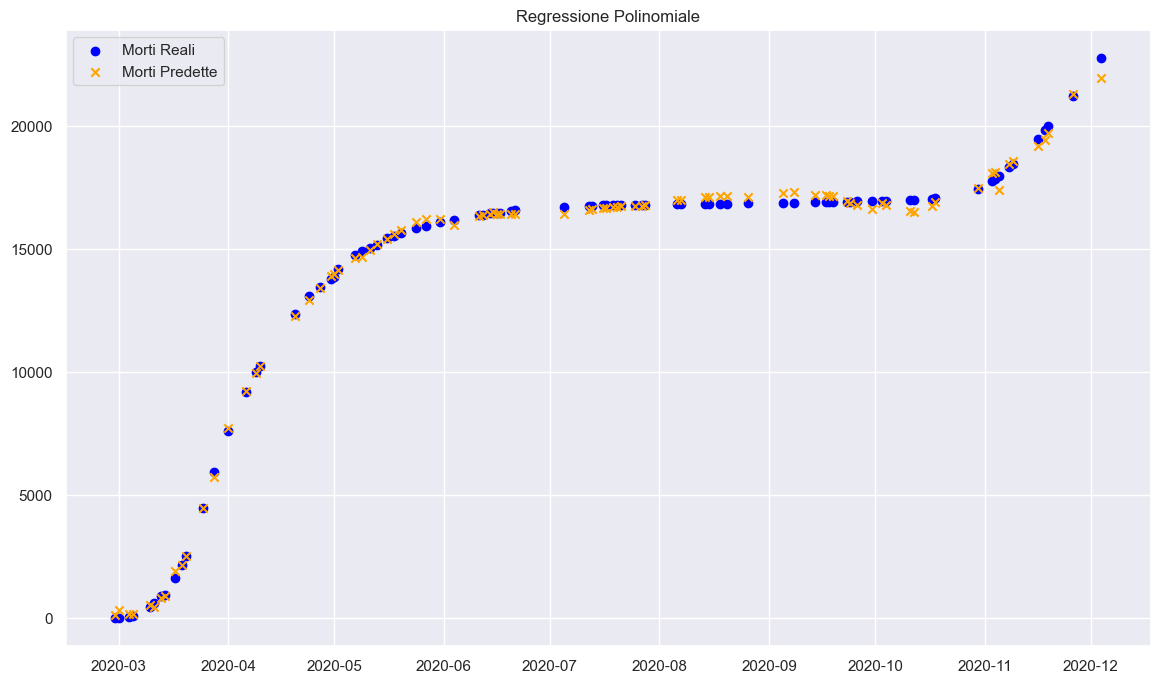

{'RMSE': 223.62445359104453,
 'MAE': 169.96917844961413,
 'R2': 0.9984682901817203}

In [66]:
poly.getChart()
poly.metrics()

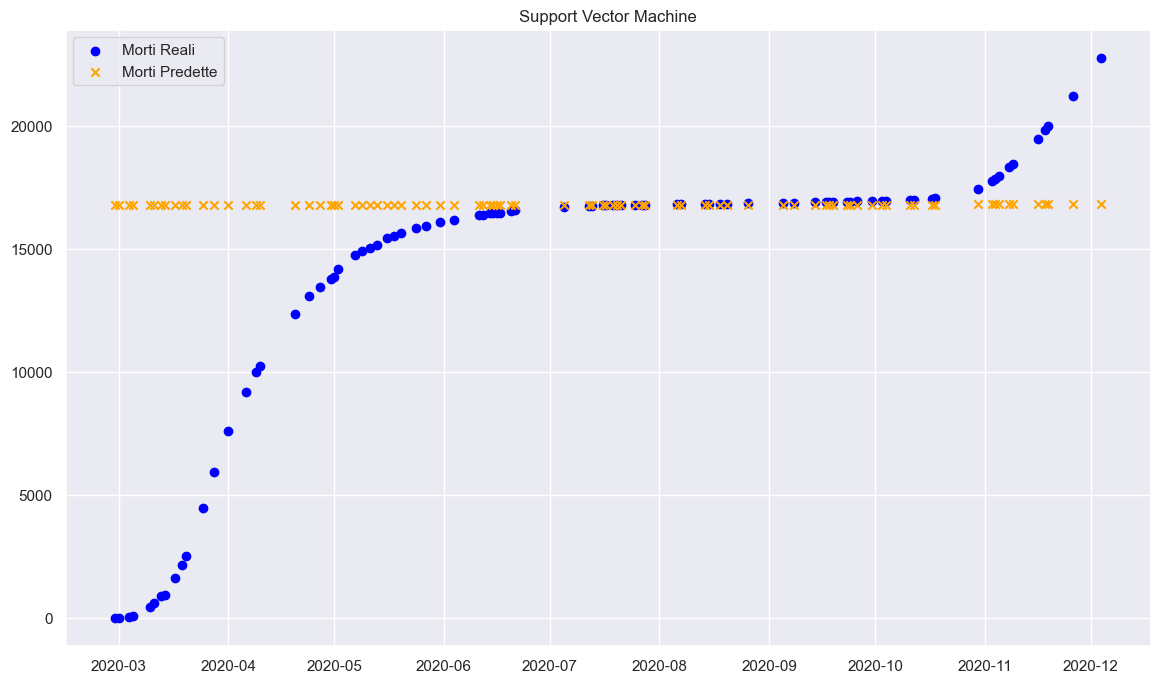

{'RMSE': 6324.506956276411, 'MAE': 3380.1089896641092, 'R2': -0.22515563129394}

In [67]:
sVM.getChart()
sVM.metrics()

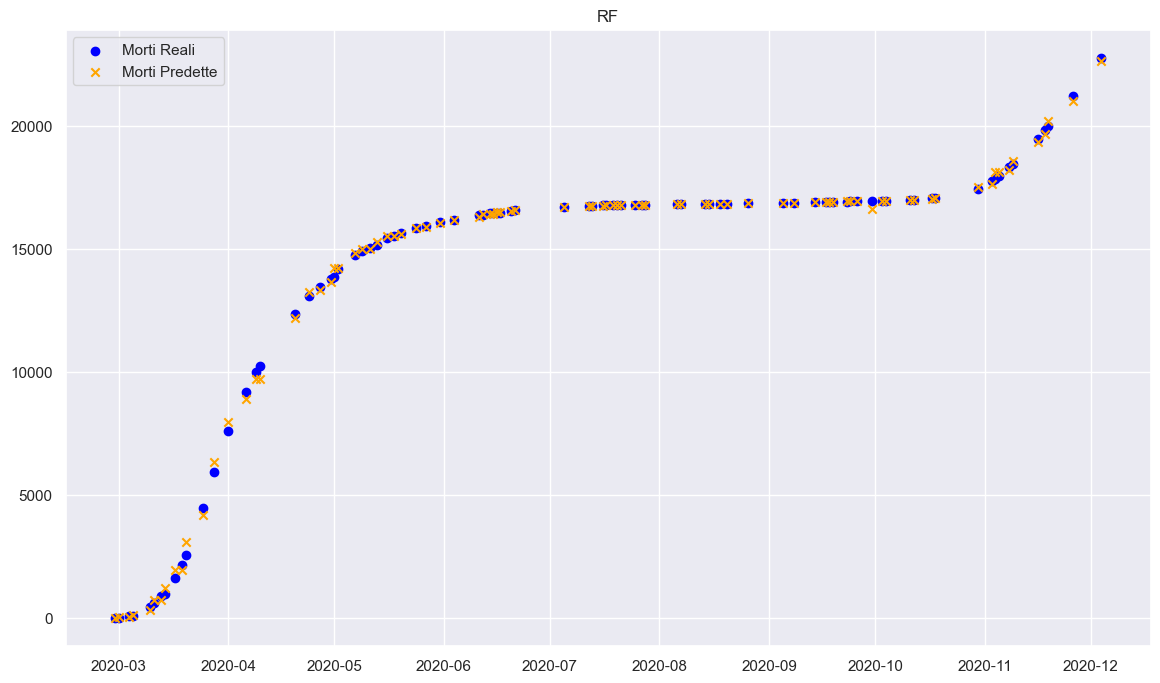

{'RMSE': 153.54766379685256,
 'MAE': 91.45977011494253,
 'R2': 0.9992778551181027}

In [68]:
forest.getChart()
forest.metrics()

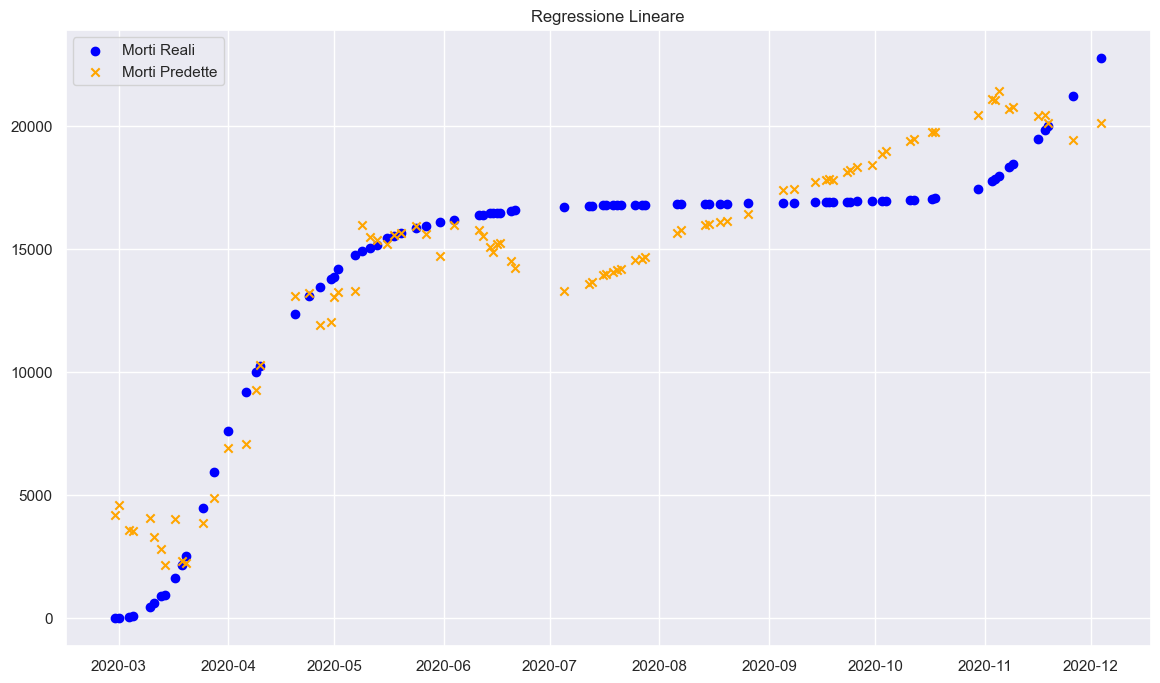

{'RMSE': 1943.6918484120893,
 'MAE': 1600.330510466947,
 'R2': 0.8842841798092251}

In [69]:
regL.getChart()
regL.metrics()

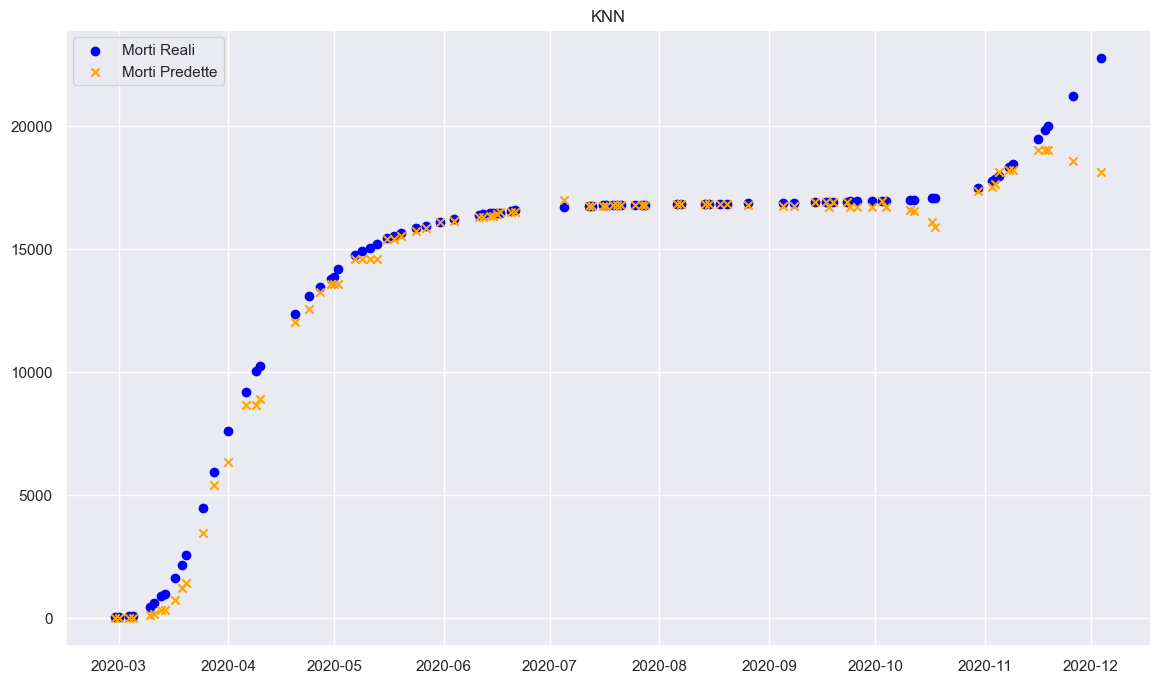

{'RMSE': 729.4034958581669, 'MAE': 361.6896551724138, 'R2': 0.983704278556941}

In [70]:
knn.getChart()
knn.metrics()

#### Tre modelli hanno un'alta precisione: RandomForest, Regressione Polinomiale e KNN

In [71]:
data_to_predict = {
    'TotalHospitalizedPatients': [7143,6954, 6493, 6361, 6150, 6006],
    'CurrentPositiveCases': [116000, 111829, 89903,87243, 87449, 85066],
    'IntensiveCarePatients': [781, 767, 766, 748, 733, 717],
    'Mese': [12,12,12,12,12, 12],
    'Giorno': [7,8,9,10,11,12,]
}
data_to_predict_df = pd.DataFrame(data_to_predict)
data_to_predict_df

,TotalHospitalizedPatients,CurrentPositiveCases,IntensiveCarePatients,Mese,Giorno
0,7143,116000,781,12,7
1,6954,111829,767,12,8
2,6493,89903,766,12,9
3,6361,87243,748,12,10
4,6150,87449,733,12,11
5,6006,85066,717,12,12


In [72]:
forest.predictExtData(data_to_predict_df)

array([22884, 23024, 23024, 23024, 23024, 23024], dtype=int64)

In [73]:
poly.predictExtData(data_to_predict_df)

array([20872.57171354, 20915.31452158, 23863.4744368 , 23461.49959322,
       23050.60997871, 22722.26356312])

In [74]:
regL.predictExtData(data_to_predict_df)

array([20128.93546764, 20099.28423184, 19263.91242452, 19457.251773  ,
       19353.59534617, 19465.28837159])

In [75]:
sVM.predictExtData(data_to_predict_df)

array([16839.40221407, 16837.95731952, 16826.05488528, 16824.17104407,
       16824.32946767, 16822.58458568])

In [76]:
knn.predictExtData(data_to_predict_df)

array([18118, 18118, 17414, 17357, 17357, 17357], dtype=int64)

#### Valori reali:

#### https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni

È evidente che il modello necessita di miglioramenti, in quanto la variabile dipendente "Deaths" continua ad aumentare nel tempo e non diminuirà. È importante considerare che le previsioni indicano un numero di morti compreso tra 23.461 e 23.863 al 12 dicembre. Questa previsione è confermata dai dati reali forniti i quali mostrano i seguenti numeri:

#####  07-12: 
Reale: 23080 Predict: ~ 22884
#####  08-12: 
Reale: 23208 Predict: ~ 23024
#####  09-12: 
Reale: 23277 Predict: ~ 23024
#####  10-12: 
Reale: 23449 Predict: ~ 23461
#####  11-12: 
Reale: 23581 Predict: ~ (23461 - 23863)
#####  12-12: 
Reale: 23666 Predict: ~ (23461 - 23863)